In [206]:
!pip install scipy

In [207]:
#Cargamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [208]:
#Cargar archivo CSV
df = pd.read_csv('Cuantis_Madrid.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20751 entries, 0 to 20750
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tasa_respuesta_anfitrion     20751 non-null  float64
 1   tasa_aceptacion_anfitrion    20751 non-null  float64
 2   total_anuncios_anfitrion     20751 non-null  float64
 3   capacidad                    20751 non-null  float64
 4   banos                        20751 non-null  float64
 5   habitaciones                 20751 non-null  float64
 6   camas                        20751 non-null  float64
 7   precio                       20751 non-null  float64
 8   noches_minimas               20751 non-null  float64
 9   noches_maximas               20751 non-null  float64
 10  promedio_min_noches          20751 non-null  float64
 11  promedio_max_noches          20751 non-null  float64
 12  disponibilidad_30d           20751 non-null  int64  
 13  disponibilidad_6

tasa_respuesta_anfitrion

In [209]:
# Calcular la correlación de todas las variables con 'tasa_respuesta_anfitrion' y ordenarlas de mayor a menor
correlaciones = df.corr(numeric_only=True)['tasa_respuesta_anfitrion'].sort_values(ascending=False)
print(correlaciones)

tasa_respuesta_anfitrion       1.000000
tasa_aceptacion_anfitrion      0.616680
ocupacion_estimada_365d        0.191985
es_superanfitrion              0.177871
ingresos_estimados_365d        0.174268
num_resenas_30d                0.171631
num_resenas_12m                0.167827
num_resenas_1y                 0.138936
num_resenas                    0.131570
promedio_max_noches            0.106454
capacidad                      0.080502
precio                         0.073758
camas                          0.060186
noches_maximas                 0.049829
banos                          0.046726
habitaciones                   0.034330
promedio_min_noches            0.012412
review_scores_value            0.008793
review_scores_rating           0.004339
review_scores_communication    0.003725
review_scores_accuracy         0.002963
review_scores_location        -0.001159
noches_minimas                -0.001332
review_scores_checkin         -0.004212
review_scores_cleanliness     -0.011666


C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\2477408650.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\2477408650.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")


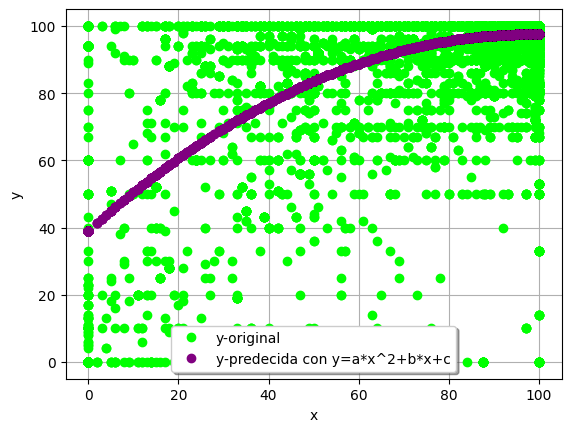

In [210]:
x = df['tasa_aceptacion_anfitrion'].values
y = df['tasa_respuesta_anfitrion'].values

def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['tasa_aceptacion_anfitrion'], df['tasa_respuesta_anfitrion'])

# Predicciones
y_pred1 = func1(x, *parametros1)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "lime")
plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [211]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
R2_Modelo1 


0.4327870852617567

In [212]:

#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2_Modelo1)
R

np.float64(0.6578655525726793)

C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\1362902859.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\1362902859.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")


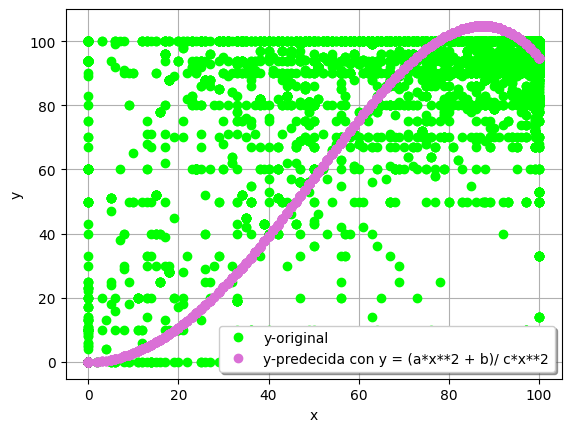

In [213]:
#Modelo 2
def func2(x, a, b, c):
    return (a*x**2 + b)/ c*x**2

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['tasa_aceptacion_anfitrion'], df['tasa_respuesta_anfitrion'])

# Predicciones
y_pred2 = func2(x, *parametros2)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "lime")
plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [214]:
#calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2)
R2_Modelo2

-0.25834010506948246

In [215]:
#calculamos el coeficiente de correlación del modelo
R2 = np.sqrt(abs(R2_Modelo2))
R2

np.float64(0.5082716843081881)

tasa_aceptacion_anfitrion

In [216]:
# Calcular la correlación de todas las variables con 'tasa_aceptacion_anfitrion' y ordenarlas de mayor a menor
correlaciones = df.corr(numeric_only=True)['tasa_aceptacion_anfitrion'].sort_values(ascending=False)
print(correlaciones)

tasa_aceptacion_anfitrion      1.000000
tasa_respuesta_anfitrion       0.616680
num_resenas_12m                0.263945
ocupacion_estimada_365d        0.262959
ingresos_estimados_365d        0.254857
num_resenas_1y                 0.226869
num_resenas_30d                0.225306
num_resenas                    0.194831
promedio_max_noches            0.193853
capacidad                      0.171669
precio                         0.146081
es_superanfitrion              0.138283
camas                          0.105638
noches_maximas                 0.085095
banos                          0.038479
habitaciones                   0.026201
total_anuncios_anfitrion      -0.000772
review_scores_value           -0.003521
review_scores_communication   -0.004154
review_scores_accuracy        -0.004614
review_scores_rating          -0.005338
review_scores_location        -0.008764
review_scores_checkin         -0.010870
review_scores_cleanliness     -0.012301
anuncios_activos_anfitrion    -0.012837


C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\980836960.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\980836960.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")


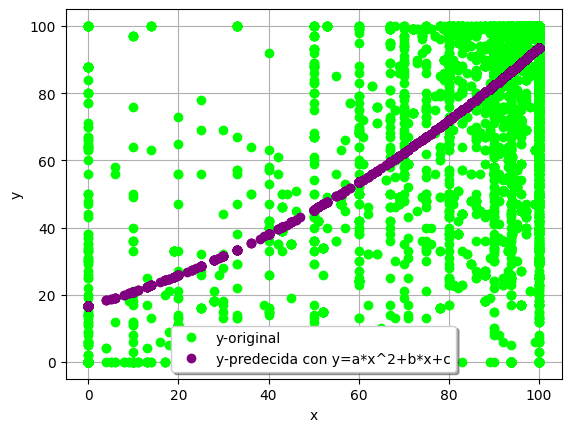

In [217]:
x = df['tasa_respuesta_anfitrion'].values
y = df['tasa_aceptacion_anfitrion'].values

# Modelo 1
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['tasa_respuesta_anfitrion'], df['tasa_aceptacion_anfitrion'])

# Predicciones
y_pred1 = func1(x, *parametros1)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "lime")
plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [218]:
#coeficiente de determinación del modelo
R2_Modelo12 = r2_score(y, y_pred1)  
R2_Modelo12

0.38693158753693224

In [219]:
#coeficiente de correlación del modelo
R2 = np.sqrt(R2_Modelo1)
R2

np.float64(0.6578655525726793)

C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\592375829.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\592375829.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")


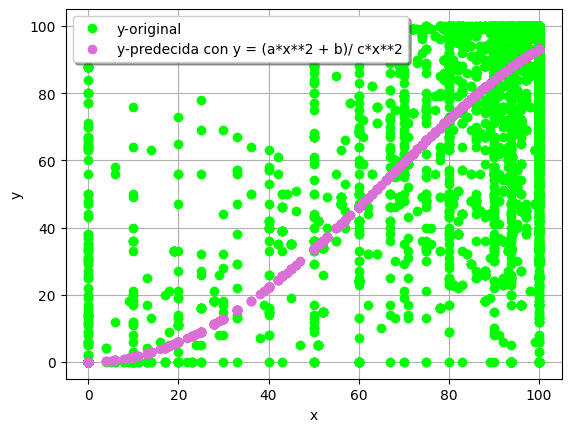

In [220]:
#Modelo 2
def func2(x, a, b, c):
    return (a*x**2 + b)/ c*x**2

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['tasa_respuesta_anfitrion'], df['tasa_aceptacion_anfitrion'])

# Predicciones
y_pred2 = func2(x, *parametros2)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "lime")
plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [221]:
#coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2)
R2_Modelo2

0.3616438772374214

In [222]:
#coeficiente de determinación del modelo
R2 = np.sqrt(R2_Modelo2)
R2

np.float64(0.601368337408465)

total_anuncios_anfitrion

In [223]:
# Calcular la correlación de todas las variables con 'total_anuncios_anfitrion' y ordenarlas de mayor a menor
correlaciones = df.corr(numeric_only=True)['total_anuncios_anfitrion'].sort_values(ascending=False)
print(correlaciones)

total_anuncios_anfitrion       1.000000
anuncios_activos_anfitrion     0.978492
noches_maximas                 0.227844
promedio_min_noches            0.212757
capacidad                      0.169831
disponibilidad_365d            0.155723
promedio_max_noches            0.129197
precio                         0.109393
camas                          0.102810
noches_minimas                 0.102063
banos                          0.092835
habitaciones                   0.064916
disponibilidad_90d             0.030395
review_scores_location         0.002250
tasa_aceptacion_anfitrion     -0.000772
review_scores_accuracy        -0.002265
review_scores_rating          -0.003520
review_scores_cleanliness     -0.003643
review_scores_communication   -0.004355
review_scores_checkin         -0.004444
review_scores_value           -0.008126
ingresos_estimados_365d       -0.010489
disponibilidad_60d            -0.014339
tasa_respuesta_anfitrion      -0.037239
disponibilidad_30d            -0.042344


C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\1636340933.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\1636340933.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")


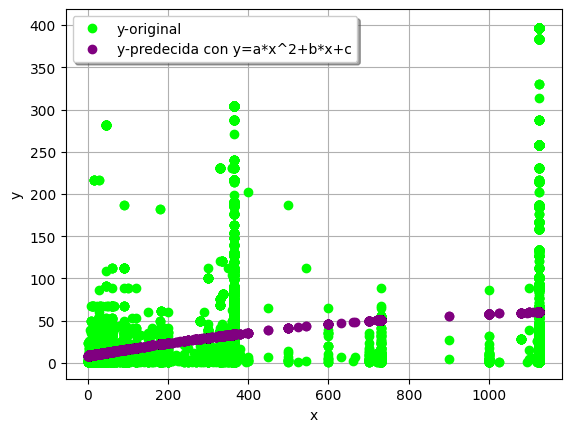

In [224]:
x = df['noches_maximas'].values
y = df['total_anuncios_anfitrion'].values

# Modelo 1
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['noches_maximas'], df['total_anuncios_anfitrion'])

# Predicciones
y_pred1 = func1(x, *parametros1)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "lime")
plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [225]:
#coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#coefficient de correlación del modelo
R2 = np.sqrt(R2_Modelo1)

R2_Modelo1, R2

(0.0542476247009509, np.float64(0.23291119488111967))

C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\835929619.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\835929619.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")


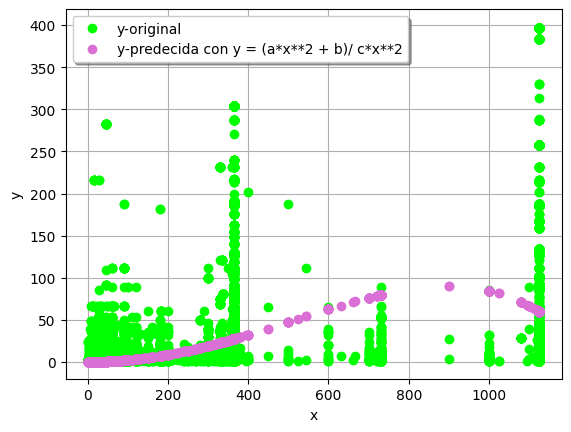

In [226]:
#Modelo 2
def func2(x, a, b, c):
    return (a*x**2 + b)/ c*x**2

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['noches_maximas'], df['total_anuncios_anfitrion'])

# Predicciones
y_pred2 = func2(x, *parametros2)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "lime")
plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [227]:
#coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2)
#coefficient de correlación del modelo
R2 = np.sqrt(R2_Modelo2)

R2_Modelo2, R2

(0.03223038866705907, np.float64(0.1795282391911063))

Capacidad

In [228]:
# Calcular la correlación de todas las variables con 'capacidad' y ordenarlas de mayor a menor
correlaciones = df.corr(numeric_only=True)['capacidad'].sort_values(ascending=False)
print(correlaciones)

capacidad                      1.000000
camas                          0.743645
habitaciones                   0.617051
precio                         0.476978
ingresos_estimados_365d        0.380942
banos                          0.372187
tasa_aceptacion_anfitrion      0.171669
total_anuncios_anfitrion       0.169831
anuncios_activos_anfitrion     0.164335
num_resenas_12m                0.128495
num_resenas_1y                 0.124122
promedio_max_noches            0.121838
noches_maximas                 0.118016
num_resenas                    0.107902
ocupacion_estimada_365d        0.099060
tasa_respuesta_anfitrion       0.080502
num_resenas_30d                0.061304
disponibilidad_365d            0.045619
promedio_min_noches            0.007333
review_scores_value            0.006972
review_scores_accuracy         0.006681
review_scores_checkin          0.006661
review_scores_cleanliness      0.004626
review_scores_location         0.002915
review_scores_rating           0.000674


C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\3209512387.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\3209512387.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")


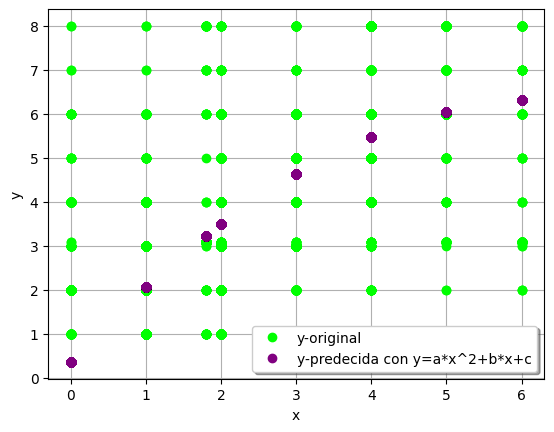

In [229]:
x = df['camas'].values
y = df['capacidad'].values

# Modelo 1
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['camas'], df['capacidad'])

# Predicciones
y_pred1 = func1(x, *parametros1)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "lime")
plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [230]:
#coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#coefficient de correlación del modelo
R2 = np.sqrt(R2_Modelo1)

R2_Modelo1, R2

(0.5746181280631668, np.float64(0.7580357036862887))

C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\649277672.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\649277672.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")


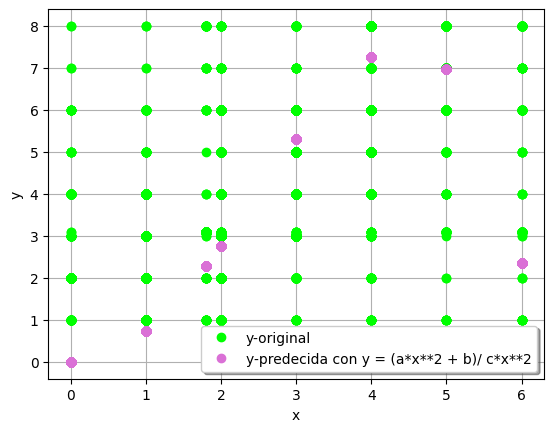

In [231]:
#Modelo 2
def func2(x, a, b, c):
    return (a*x**2 + b)/ c*x**2

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['camas'], df['capacidad'])

# Predicciones
y_pred2 = func2(x, *parametros2)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "lime")
plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [232]:
#coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2)
#coefficient de correlación del modelo
R2 = np.sqrt(R2_Modelo2)

R2_Modelo2, R2

(0.1600985519015361, np.float64(0.40012317091307786))

reviews_per_month

In [233]:
# Calcular la correlación de todas las variables con 'num_resenas_30d' y ordenarlas de mayor a menor
correlaciones = df.corr(numeric_only=True)['num_resenas_30d'].sort_values(ascending=False)
print(correlaciones)

num_resenas_30d                1.000000
num_resenas_12m                0.675859
ocupacion_estimada_365d        0.594299
num_resenas_1y                 0.493954
ingresos_estimados_365d        0.381625
num_resenas                    0.378476
es_superanfitrion              0.240289
tasa_aceptacion_anfitrion      0.225306
tasa_respuesta_anfitrion       0.171631
disponibilidad_90d             0.132483
disponibilidad_60d             0.126087
disponibilidad_365d            0.085915
disponibilidad_30d             0.083814
capacidad                      0.061304
promedio_max_noches            0.034449
camas                          0.026273
review_scores_cleanliness     -0.005291
review_scores_rating          -0.009470
review_scores_value           -0.011243
review_scores_location        -0.011443
precio                        -0.013094
review_scores_communication   -0.013513
review_scores_accuracy        -0.013825
banos                         -0.016613
review_scores_checkin         -0.019704


C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\85121197.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\85121197.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")


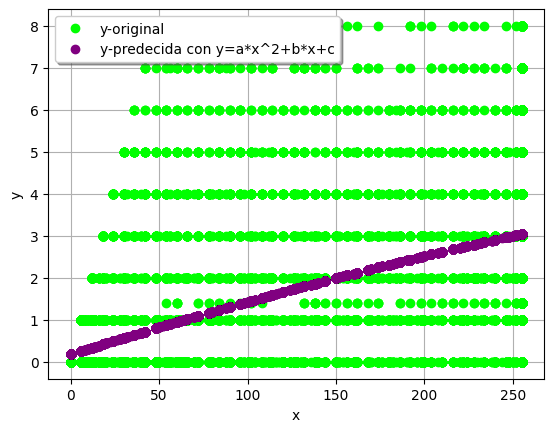

In [234]:
x = df['ocupacion_estimada_365d'].values
y = df['num_resenas_30d'].values

# Modelo 1
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['ocupacion_estimada_365d'], df['num_resenas_30d'])

# Predicciones
y_pred1 = func1(x, *parametros1)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "lime")
plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [235]:
#coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#coefficient de correlación del modelo
R2 = np.sqrt(R2_Modelo1)

R2_Modelo1, R2

(0.3539306294963763, np.float64(0.5949206917702361))

C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\168061330.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\168061330.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")


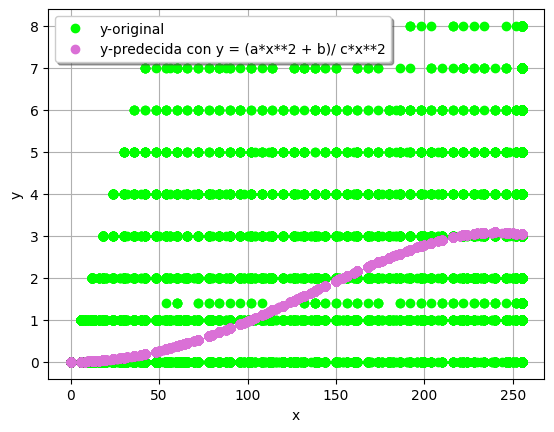

In [236]:
#Modelo 2
def func2(x, a, b, c):
    return (a*x**2 + b)/ c*x**2

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['ocupacion_estimada_365d'], df['num_resenas_30d'])

# Predicciones
y_pred2 = func2(x, *parametros2)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "lime")
plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [237]:
#coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2)
#coefficient de correlación del modelo
R2 = np.sqrt(R2_Modelo2)

R2_Modelo2, R2

(0.30631321788010113, np.float64(0.5534557054363982))

Price

In [238]:
# Calcular la correlación de todas las variables con 'precio' y ordenarlas de mayor a menor
correlaciones = df.corr(numeric_only=True)['precio'].sort_values(ascending=False)
print(correlaciones)

precio                         1.000000
capacidad                      0.476978
camas                          0.443464
habitaciones                   0.422411
ingresos_estimados_365d        0.363748
banos                          0.319574
tasa_aceptacion_anfitrion      0.146081
promedio_max_noches            0.117102
noches_maximas                 0.115711
total_anuncios_anfitrion       0.109393
anuncios_activos_anfitrion     0.104135
disponibilidad_365d            0.077308
tasa_respuesta_anfitrion       0.073758
num_resenas                    0.064661
num_resenas_1y                 0.063291
es_superanfitrion              0.058653
num_resenas_12m                0.041344
disponibilidad_90d             0.037481
disponibilidad_60d             0.028603
review_scores_value            0.019751
review_scores_accuracy         0.018654
review_scores_checkin          0.018012
ocupacion_estimada_365d        0.014532
review_scores_location         0.014091
review_scores_rating           0.013381


C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\3763551910.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\3763551910.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")


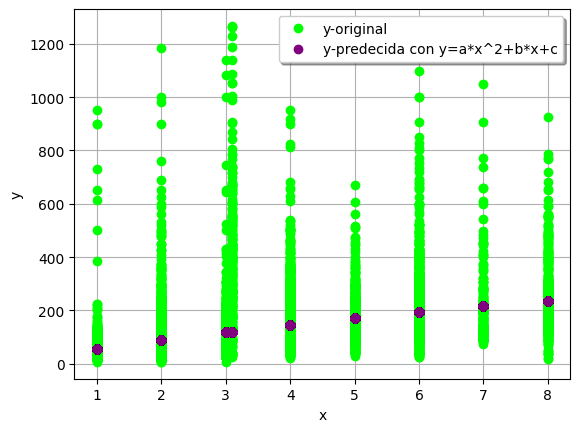

In [239]:
x = df['capacidad'].values
y = df['precio'].values

# Modelo 1
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Ajustamos los parámetros de la función curve_fit
parametros1, covs= curve_fit(func1, df['capacidad'], df['precio'])

# Predicciones
y_pred1 = func1(x, *parametros1)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original", color= "lime")
plt.plot(x, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "purple")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [240]:
#coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1)
#coefficient de correlación del modelo
R2 = np.sqrt(R2_Modelo1)

R2_Modelo1, R2

(0.2289399850449273, np.float64(0.47847673406857233))

C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\1556412769.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original" , color= "lime")
C:\Users\ISAAC\AppData\Local\Temp\ipykernel_32752\1556412769.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")


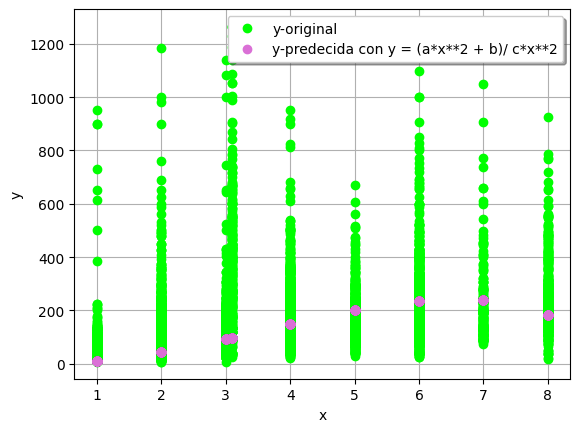

In [241]:
#Modelo 2
def func2(x, a, b, c):
    return (a*x**2 + b)/ c*x**2

#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['capacidad'], df['precio'])

# Predicciones
y_pred2 = func2(x, *parametros2)

#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original" , color= "lime")
plt.plot(x, y_pred2, 'bo', label="y-predecida con y = (a*x**2 + b)/ c*x**2", color= "orchid")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [242]:
#coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2)
#coefficient de correlación del modelo
R2 = np.sqrt(R2_Modelo2)

R2_Modelo2, R2

(0.06039553723814184, np.float64(0.24575503502093674))

In [243]:
tabla_coef = pd.DataFrame([
    ['host_response_rate', 'Modelo 1', 0.4327870852617567, 0.6578655525726793],
    ['host_response_rate', 'Modelo 2', -0.25834010506948246, 0.5082716843081881],
    ['host_acceptance_rate', 'Modelo 1', 0.38693158753693224, 0.6578655525726793],
    ['host_acceptance_rate', 'Modelo 2', 0.3616438772374214, 0.601368337408465],
    ['host_total_listings_count', 'Modelo 1', 0.0542476247009509, 0.23291119488111967],
    ['host_total_listings_count', 'Modelo 2', 0.03223038866705907, 0.1795282391911063],
    ['accommodates', 'Modelo 1', 0.5746181280631668, 0.7580357036862887],
    ['accommodates', 'Modelo 2', 0.1600985519015361, 0.40012317091307786],
    ['reviews_per_month', 'Modelo 1', 0.3539306294963763, 0.5949206917702361],
    ['reviews_per_month', 'Modelo 2', 0.30631321788010113, 0.5534557054363982],
    ['Price', 'Modelo 1', 0.2289399850449273, 0.47847673406857233],
    ['Price', 'Modelo 2', 0.06039553723814184, 0.24575503502093674],
], columns=['Variable objetivo', 'Modelo', 'R² (Determinación)', 'Correlación'])

display(tabla_coef)

,Variable objetivo,Modelo,R² (Determinación),Correlación
0,host_response_rate,Modelo 1,0.432787,0.657866
1,host_response_rate,Modelo 2,-0.258340,0.508272
2,host_acceptance_rate,Modelo 1,0.386932,0.657866
3,host_acceptance_rate,Modelo 2,0.361644,0.601368
4,host_total_listings_count,Modelo 1,0.054248,0.232911
5,host_total_listings_count,Modelo 2,0.032230,0.179528
6,accommodates,Modelo 1,0.574618,0.758036
7,accommodates,Modelo 2,0.160099,0.400123
8,reviews_per_month,Modelo 1,0.353931,0.594921
9,reviews_per_month,Modelo 2,0.306313,0.553456
